In [30]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from tqdm import tqdm
from collections import defaultdict, Counter

import numpy.linalg as la
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', -1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


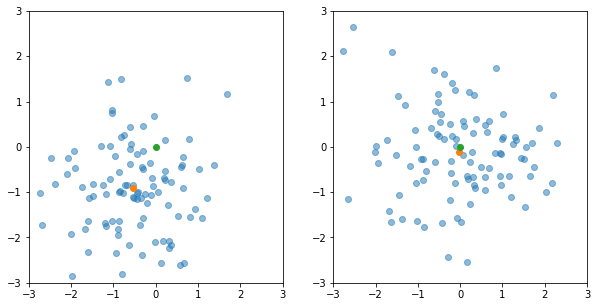

In [31]:
x1 = (np.random.randn(100, 2) - 0.7)
x2 = (np.random.randn(100, 2))

fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.scatter(x1[:,0], x1[:,1], alpha=.5)
ax0.scatter(*x1.mean(axis=0))
ax0.scatter(0, 0)
ax0.set_xlim([-3, 3])
ax0.set_ylim([-3, 3])

ax1.scatter(x2[:,0], x2[:,1], alpha=.5)
ax1.scatter(*x2.mean(axis=0))
ax1.scatter(0, 0)
ax1.set_xlim([-3, 3])
ax1.set_ylim([-3, 3])

plt.show()

Give a set of normalized vectors, want to meansure their mean. How confident is this mean can be meansured by the norm of this mean. 

In [32]:
x1_n = normalize(x1, axis=1)
x2_n = normalize(x2, axis=1)
la.norm(x1_n, axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [33]:
x1_n_mean = x1_n.mean(axis=0)
x2_n_mean = x2_n.mean(axis=0)
x1_n_mean, la.norm(x1_n_mean)

(array([-0.31532792, -0.53072838]), 0.6173364705273314)

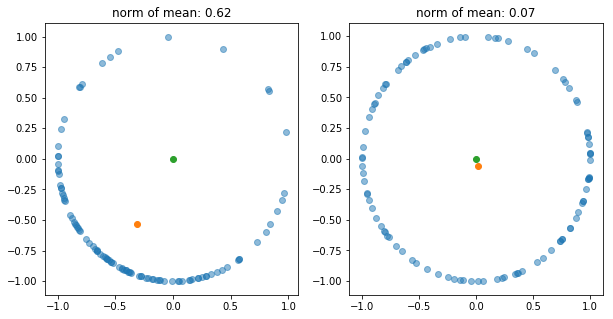

In [34]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(10, 5))
ax0.scatter(x1_n[:,0], x1_n[:,1], alpha=.5)
ax0.scatter(*x1_n.mean(axis=0))
ax0.scatter(0, 0)
ax0.set(title="norm of mean: %s" % la.norm(x1_n_mean).round(2))

ax1.scatter(x2_n[:,0], x2_n[:,1], alpha=.5)
ax1.scatter(*x2_n.mean(axis=0))
ax1.scatter(0, 0)
ax1.set(title="norm of mean: %s" % la.norm(x2_n_mean).round(2))

plt.show()